# Featured Image extractions
## Written by: * Ronny Meza *

The course project focused on *extraction of image features*; Because it is an important component of the process of pattern recognition and image processing, feature extraction begins with an initial set of data usually defined by static images or video images, this images are processed and an image is constructed, arrangement of derived values, defined as characteristics, which are intended to be informative and non-redundant, facilitating learning and generalization processes, and in some cases they are used to improve human interpretations. The extraction of characteristics is related to the reduction of dimensionality, which is approached by techniques of analysis of the content of variance as it is the analysis of main components.

When the input data of an algorithm is too large to be processed and the structure of the data is suspected to be redundant, then it can be transformed into a reduced set of characteristics (also called *feature vector*). The determination of a subset of the initial characteristics is called feature selection. It is expected that the selected features contain the relevant information of the input data, so that the desired task can be performed using this reduced representation instead of the full initial data. During the development of the different activities of the project different techniques of extraction of image characteristics will be addressed and in the end automatic learning algorithms will be used to identify key features of the human face.

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.misc
from glob import glob
import time 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Extraction of color characteristics

Color is one of the most important and most direct characteristics that humans perceive when they see an image. The human vision system is more sensitive to color information than to gray levels, so color is the first candidate used to extract characteristics in images. The color histogram is the most common method used to represent color contents. The algorithms follow the following steps: Selection of a color space, representation of color characteristics and matching algorithms.

The RGB color space is the most used for images on the computer, because the computer screen uses a combination of colors (red, green, blue), to show any perceived color. Each pixel on the screen is composed of three points that are stimulated by the colors red, green and blue by an electron gun separately. Next, different cases will be evaluated through the decomposition in the RGB spectrum of the images.

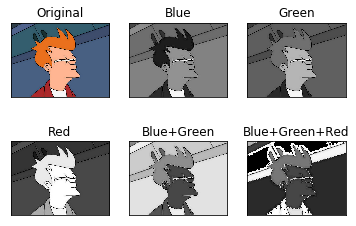

In [3]:
# Extraccion de los espectros de color de la imagen
img_fray = cv2.imread('Fry.jpg',1)
[b, g, r]  =  cv2.split(img_fray) 

#Se ordena correctamente el codigo RGB de la imagen (opncv lo maneja diferente)
img_fray2 = cv2.cvtColor(img_fray, cv2.COLOR_BGR2RGB)

# Operaciones con los espectros de la imagen
fry_bg = b + g
fry_bgr = b + g + r

titulos = ['Original','Blue','Green','Red','Blue+Green','Blue+Green+Red']
imagenes_fray = [img_fray2, b, g, r, fry_bg, fry_bgr]


#Implementacion de ciclo for para graficar las imagenes
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(imagenes_fray[i],'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

plt.show()


## Threshold (image processing)

The threshold is the simplest method of image segmentation. The simplest thresholding methods replace each pixel in an image with a black pixel if the intensity of the image $ I_ {i, j} $, is less than some fixed constant * T * (that is, $ I_ {i, j } $ * <T *, or a white pixel if the intensity of the image is greater than that constant.

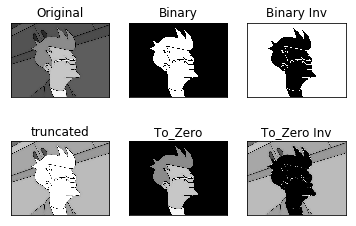

In [4]:
#Aplicacion de Thresholding
img_fray = cv2.imread('Fry.jpg',0)
ret,umbral1 = cv2.threshold(img_fray,127,255,cv2.THRESH_BINARY)
ret,umbral2 = cv2.threshold(img_fray,127,255,cv2.THRESH_BINARY_INV)
ret,umbral3 = cv2.threshold(img_fray,127,255,cv2.THRESH_TRUNC)
ret,umbral4 = cv2.threshold(img_fray,127,255,cv2.THRESH_TOZERO)
ret,umbral5 = cv2.threshold(img_fray,127,255,cv2.THRESH_TOZERO_INV)

titulos = ['Original','Binary','Binary Inv','truncated','To_Zero','To_Zero Inv']
#Arreglo en estructura matricial
imagenes_fray = [img_fray, umbral1, umbral2, umbral3, umbral4, umbral5]

#Implementacion de ciclo for para graficar las imagenes
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(imagenes_fray[i],'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

plt.show()


## Adaptive thresholds

Automatic Threshold is an excellent way to extract useful information encoded in pixels and minimize background noise. This is achieved by using a feedback loop to optimize the threshold value before converting the original image in grayscale to binary. The idea is to separate the image into two parts; the background and the foreground.

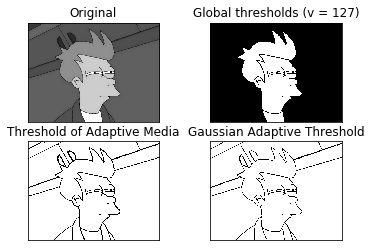

In [5]:
#Aplicacion de Umbrales adaptativos para deteccion de bordes
#Aplicacion del filtro de suavizado medianblur
fry_image = cv2.medianBlur(img_fray,5)

ret,umbral_adap1 = cv2.threshold(fry_image,127,255,cv2.THRESH_BINARY)
umbral_adap2 = cv2.adaptiveThreshold(fry_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
umbral_adap3 = cv2.adaptiveThreshold(fry_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titulos = ['Original', 'Global thresholds (v = 127)',
            'Threshold of Adaptive Media', 'Gaussian Adaptive Threshold']
#Arreglo en estructura matricial
imagenes_fray = [fry_image, umbral_adap1, umbral_adap2, umbral_adap3]

#Implementacion de ciclo for para graficar las imagenes
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(imagenes_fray[i],'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

plt.show()


# Histogram of oriented gradients

The oriented gradient histogram (HOG) is a feature descriptor used in computer vision and image processing to detect objects. The technique counts the occurrences of gradient orientation in localized portions of an image.

The essential thought behind the histogram of the oriented gradient descriptor is that the appearance of the local object and the shape within an image can be described by the distribution of the intensity gradients or the directions of the edges. The image is divided into small connected regions called cells, and for the pixels within each cell, a gradient address histogram is compiled. The descriptor is the concatenation of these histograms. For greater accuracy, local histograms can be normalized by contrast by calculating a measure of the intensity in a larger region of the image, called a block, and then using this value to normalize all the cells within the block. This normalization results in a better invariance to changes in lighting and shading. 
Taken from: https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients


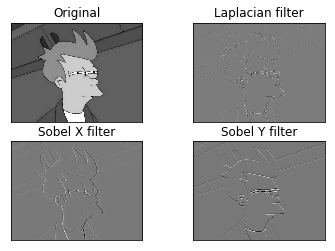

In [6]:
#Application of Gradient Filters

#Filtro de mascara laplaciana
laplaciano = cv2.Laplacian(fry_image,cv2.CV_64F)
#Filtro de Sobel en la direccion X
sobel_x = cv2.Sobel(fry_image,cv2.CV_64F,1,0,ksize=5)
#Filtro de Sobel en la Direccion Y
sobel_y = cv2.Sobel(fry_image,cv2.CV_64F,0,1,ksize=5)

titulos = ['Original', 'Laplacian filter',
            'Sobel X filter', 'Sobel Y filter']
#Arreglo en estructura matricial
imagenes_fray = [fry_image, laplaciano, sobel_x, sobel_y]

#Implementacion de ciclo for para graficar las imagenes
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(imagenes_fray[i], 'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

plt.show()


# Application of Featured Image extractions Techniques

## Canny Edge Detection

Canny's edge detection algorithm is a popular method of edge detection. It was developed by John F. Canny in 1986. It is characterized as a multi-step algorithm. Canny's edge detection algorithm uses a filter based on the first derivative of a Gaussian. Since it is susceptible to noise present in raw image data, the original image is transformed with a Gaussian filter. The result is a slightly blurry image compared to the original version. This new image is not affected by a single pixel of noise to a significant degree. 

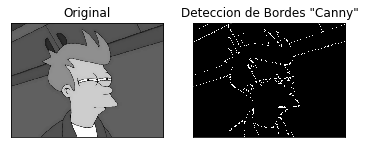

In [7]:
#Aplicacion del algoritmo de Canny
bordes_canny = cv2.Canny(fry_image,100,200)

plt.subplot(121),plt.imshow(fry_image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bordes_canny,cmap = 'gray')
plt.title('Deteccion de Bordes "Canny"'), plt.xticks([]), plt.yticks([])

plt.show()

## Histogram of Images

The histogram of an image is a graphic representation of the tone distribution of a digital image. Its construction is based on the number of pixels for each tone value. The horizontal axis of the graph represents the tonal variations, while the vertical axis represents the number of pixels in that particular tone.

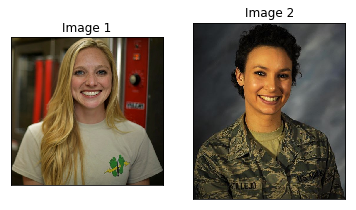

In [8]:
#Construccion de Histogramas de imagenes
img_1 = cv2.imread('python1.jpg',1)
img_2 = cv2.imread('python2.jpg',1)

plt.subplot(121),plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.title('Image 2'), plt.xticks([]), plt.yticks([])

plt.show()


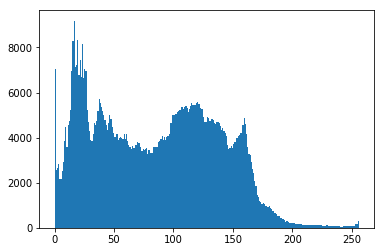

In [15]:
plt.hist(img_1.ravel(),256,[0,256]) 
plt.show()

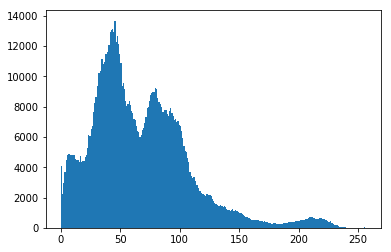

In [16]:
plt.hist(img_2.ravel(),256,[0,256]) 
plt.show()

## Construction of histograms of the RGB spectra

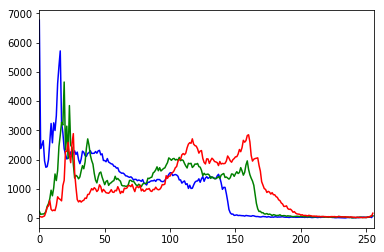

In [17]:
#Construction of histograms of the RGB spectra (image 1)

color = ('b','g','r')
for i,columna in enumerate(color):
    histograma = cv2.calcHist([img_1],[i],None,[256],[0,256])
    plt.plot(histograma,color = columna)
    plt.xlim([0,256])
plt.show()

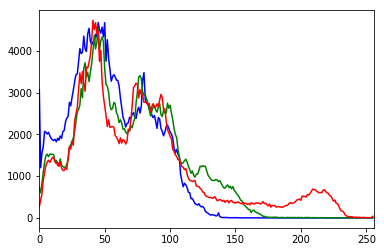

In [9]:
#Construction of histograms of the RGB spectra (image 2)

color = ('b','g','r')
for i,columna in enumerate(color):
    histograma = cv2.calcHist([img_2],[i],None,[256],[0,256])
    plt.plot(histograma,color = columna)
    plt.xlim([0,256])
plt.show()

## Fourier Transform in Numpy

The Fourier Transform is used to analyze the dominant frequency characteristics of various filters. In the particular case of the images, the Discrete Fourier Transform 2D (DFT) is used to find the frequency domain. For this, a fast algorithm called Fast Fourier Transform (FFT) is used, which is used to calculate the DFT.

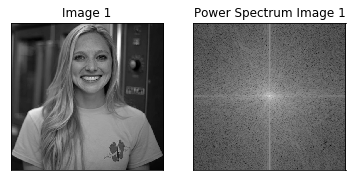

In [10]:
img_1 = cv2.imread('python1.jpg',0)
freq1 = np.fft.fft2(img_1)
fshift = np.fft.fftshift(freq1)
espectro = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_1, cmap = 'gray')
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(espectro , cmap = 'gray')
plt.title('Power Spectrum Image 1'), plt.xticks([]), plt.yticks([])
plt.show()


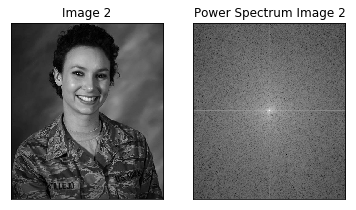

In [11]:
img_2 = cv2.imread('python2.jpg',0)
freq2 = np.fft.fft2(img_2)
fshift = np.fft.fftshift(freq2)
espectro  = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_2, cmap = 'gray')
plt.title('Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(espectro , cmap = 'gray')
plt.title('Power Spectrum Image 2'), plt.xticks([]), plt.yticks([])
plt.show()


# Random Noise Removal of Color Images

The most common noise is random Gaussian in nature due to its mathematical probability distribution model, associated with a Gaussian bell. The noise reduction algorithms can be applied at the gray scale level or by channels for each of the chromatic components (R, G, B) separately, which could increase the calculation complexity and thus the computation time. . Next, the noise removal process will be carried out using the algorithm * cv2.fastNlMeansDenoisingColored (), * which is used to eliminate noise from color images, assuming that the noise is Gaussian in nature. 

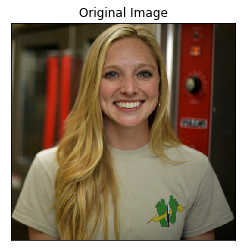

In [12]:
img_1 = cv2.imread('python1.jpg')

dst = cv2.fastNlMeansDenoisingColored(img_1,None,10,10,7,21)

plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Image filtered by the filter for random noise removal

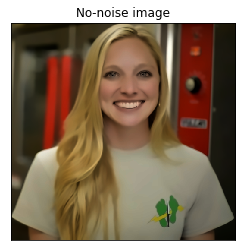

In [13]:
#Image filtered by the filter for random noise removal
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('No-noise image'), plt.xticks([]), plt.yticks([])
plt.show()

# Local Binary Patterns

Local binary patterns (*LBP*) are a type of visual descriptor used for classification in computer vision. The LBP is the particular case of the texture Spectrum model proposed in 1990. The LBP was first described in 1994. Since then it has been discovered that it is a powerful feature for the classification of textures.

(https://en.wikipedia.org/wiki/Local_binary_patterns). To perform the extraction of image characteristics by using the LBP algorithm, the Ahmedur Rahman Shovon code was used, available at the following link: (https://github.com/arsho/local_binary_patterns). 

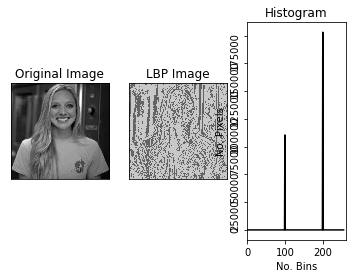

In [14]:
#Funcion para definir el pixel central de una mascara de 3x3
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


#Funcion que realizara la comparacion entre los diferentes pixels
def calculated_pixel(img, x, y):
    center = img[x][y]
    left = get_pixel(img, center, x, y-1)    
    right = get_pixel(img, center, x, y+1)
    if left>right:
        return 100
    else:
        return 200

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)            
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()

#Funcion principal donde se realiza la lectura de la imagen y se transforma a escala de grises
def main():
    image_file = 'python1.jpg'
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    img_two_bin = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_two_bin[i, j] = calculated_pixel(img_gray, i, j)
                
#Construccion del histograma                
    hist_two_bin = cv2.calcHist([img_two_bin], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Original Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_two_bin,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_two_bin,
        "xlabel": "No. Bins",
        "ylabel": "No. Pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram",
        "type": "histogram"
    })

    show_output(output_list)
                             
       
if __name__ == '__main__':
    main()

# Manipulation and image processing

In this section the construction, manipulation and processing of basic images will be addressed using the basic scientific modules NumPy and SciPy. Digital image processing is the set of techniques that are applied to digital images in order to improve the quality or facilitate the search for information. It is defined as the set of techniques encompassed within the image preprocessing whose main objective is to obtain, from a source image, another final whose result is more suitable for a specific application by improving certain characteristics of the same that makes it possible to carry out processing operations on over it.

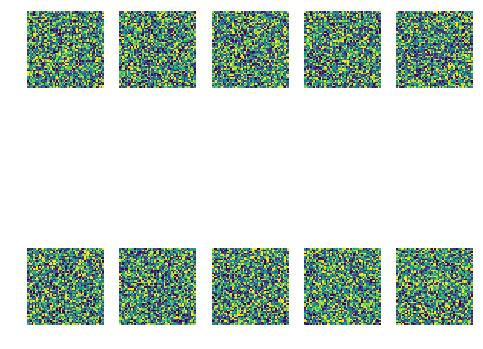

In [24]:
#Creation and visualization of a list of random images

w=50
h=50
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    plt.imsave('random_%02d.png' % i, img)
    filelist = glob('random*.png')
    filelist.sort()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()


## Images from Scipy Library

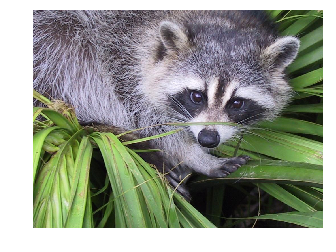

In [25]:
#Next, images stored in the scipy library will be used
from scipy import misc
f = misc.face()
#Imagen de un mapache 
plt.imsave('face.png', f) 
plt.imshow(f)
plt.axis('off')
plt.show()

In [26]:
#Saving backup images
face = misc.face()
#Se crea una copia de la imagen
plt.imsave('face.png', face)
#Lectura de la imagen de respaldo
face = plt.imread('face.png')
#Caracteristicas de la imagen
face.shape, face.dtype

((768, 1024, 4), dtype('float32'))

(-0.5, 1023.5, 767.5, -0.5)

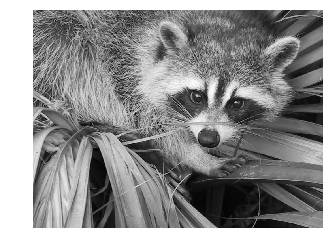

In [27]:
#Deployment of grayscale images
f = misc.face(gray=True)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')

## Image contrast

Contrast is defined as the relative difference in intensity between a point in an image. A simple example is the contrast between an object of constant brightness on a background of constant brightness. If both surfaces have the same brightness, the contrast will be zero and if the set is in shades of gray, the object will be both physically and perceptibly indistinguishable from the background. As the difference in brightness increases, the object will be noticeably distinguishable from the background once the contrast threshold is reached, which is around 0.3% difference. Taken from: https://es.wikipedia.org/wiki/Contraste

(-0.5, 1023.5, 767.5, -0.5)

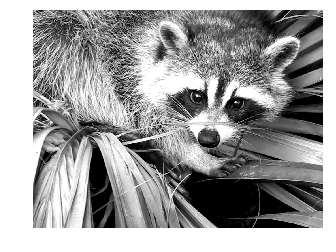

In [28]:
#Manipulacion del contraste de la imagen
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200) 
plt.axis('off')

## Contour lines

The function contour () * draw contour lines in the image. Except where indicated otherwise; when you apply this function on an image, you construct a contour plot of a Z matrix; which can change according to the parameters that are defined. 

(-0.5, 1023.5, 767.5, -0.5)

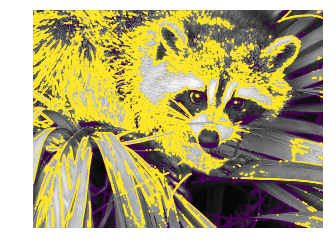

In [29]:
#Graficar lineas de contorno de la imagen
f = misc.face(gray=True)
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [30, 150])    
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

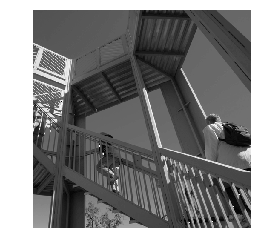

In [17]:
#Trabajando con la imagen ascent de la libreria scipy
from pylab import imread, imsave, savefig
ascent = scipy.misc.ascent()
imsave('ascent', ascent)
ascent_reloaded = cv2.imread('ascent.png',0)
plt.imshow(ascent_reloaded, 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

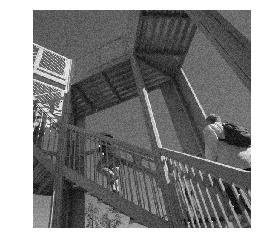

In [18]:
#Remocion de ruido

#Incorporacion de ruido gaussiano a la imagen
ruido = ascent_reloaded + 0.95 * ascent_reloaded.std() * np.random.random(ascent_reloaded.shape)
plt.imshow(ruido, 'gray')
plt.axis('off')

## Gaussian Noise Removal

Next, an image will be taken and Gaussian noise will be incorporated, which will be removed through the application of different filters available in *scipy*. The filters are multidimensional in nature, which implies that their implementation is based on a sequence of unidimensional convolution filters. The purpose of the different tests is to evaluate the performance of each filtering algorithm by visual inspection.

(-0.5, 511.5, 511.5, -0.5)

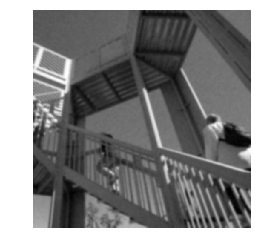

In [19]:
#Application of a Gaussian noise removal filter
from  scipy import ndimage

gauss_filter = ndimage.gaussian_filter(ruido, sigma=2)
plt.imshow(gauss_filter, 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

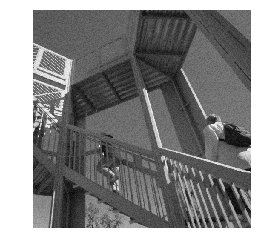

In [20]:
#Application of a media filter

filtro_med = ndimage.median_filter(ruido, 2)
plt.imshow(filtro_med, 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

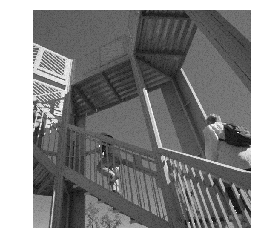

In [34]:
#Application of the maximum value filter

filtro_max=ndimage.maximum_filter(ruido, 2)
plt.imshow(filtro_max, 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

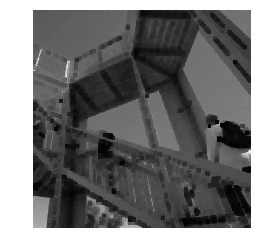

In [35]:
#Application of the percentile filter
#The filter asks the percentile and the size of the analysis window as input parameters, if the 50th percentile is used
#will be similar to the average filter
filtro_perc = ndimage.percentile_filter(ruido, 0.15, 9)
plt.imshow(filtro_perc, 'gray')
plt.axis('off')

In [ ]:
#Application of the Wiener non-linear filter
from  scipy import signal

#Los parametros del filtro de Wiener son los siguientes:
# mysize : lista escalar o N de longitud que muestra el tamaño de la ventana del filtro Wiener en cada dimensión. 
# noise : El poder de ruido. Si no se utiliza, entonces el ruido se estima como el promedio de la varianza local de 
# la entrada.
filtro_wiener = scipy.signal.wiener(ruido, mysize=None, noise=None)
plt.imshow(filtro_wiener, 'gray')
plt.axis('off')

# Face Detection with OpenCV

OpenCV is the most popular library for artificial vision. Originally developed in *C & C ++*, it now provides links for Python. OpenCV uses machine learning algorithms to search for faces within an image. Because people's faces are complicated, there is no simple test to tell you if you found a face or not. On the other hand, there are thousands of small patterns and characteristics that must be combined to favor the detection process. The algorithms are responsible for dividing the task of identifying the face in thousands of small tasks, each of which is easy to solve. These tasks are also called classifiers, such as those that were initially addressed in the section dedicated to extraction of image features.

An image containing a face can contain 6,000 or more classifiers, which must match for a face to be detected (within certain error limits). Simplifying this volume of information is the problem; for face detection, the algorithm starts at the top left of an image and moves down through small blocks of data defined as masks or operators, evaluating each block, constantly asking: *Is it a face? ... It is a face? ... It is a face?*; Because there are 6,000 or more tests per block, it is possible to perform millions of calculations, which can consume many computer resources. To avoid this, OpenCV uses the waterfalls.

Like a series of waterfalls, the OpenCV waterfall breaks the problem of detecting faces in multiple stages. For each block, it makes a very difficult and fast test. If that happens, perform a more detailed test, and so on. The algorithm can have between 30 and 50 of these stages called waterfalls, and will only detect a face if all stages pass.

The advantage is that most of the images will yield a negative result during the first stages, which means that the algorithm will not waste time trying the 6,000 functions on it. Instead of taking hours, face detection can now be done in real time. Below, we will show a couple of examples, which address the process of face detection and even eye detection.

In [21]:
#Load cascade library classifier training
#In order for the detectMultiScale function to function correctly, it is necessary to download the opencv files and indicate
#the path to the libraries haarcascade_frontalface_alt.xml for face detection and haarcascade_eye.xml for eye detection
#The OpenCV package is available at the following link: https://opencv.org/releases.html

cascada_rostros = cv2.CascadeClassifier('C:/Users/Ronny Meza/Documents/MATLAB/opencv/build/etc/haarcascades/haarcascade_frontalface_alt.xml')
cascada_ojos = cv2.CascadeClassifier('C:/Users/Ronny Meza/Documents/MATLAB/opencv/build/etc/haarcascades/haarcascade_eye.xml')

In [22]:
#Image reading and conversion to grayscale
imagen = cv2.imread('python1.jpg')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

## Face detection in the image

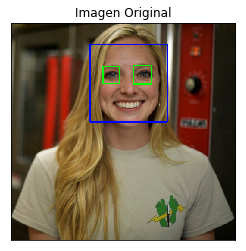

In [23]:
# Face detection in the image
rostro = cascada_rostros.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in rostro:
    imagen = cv2.rectangle(imagen,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = imagen[y:y+h, x:x+w]
    ojos = cascada_ojos.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in ojos:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
#Image reading and conversion to grayscale
img = cv2.imread('people.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
# Detect faces in the image
faces = cascada_rostros.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


In [26]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

(Text(0.5,1,'Rostros Detectados'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

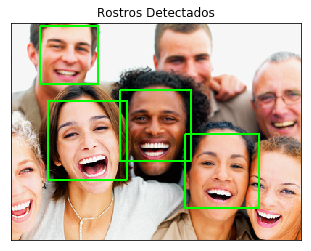

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Rostros Detectados'), plt.xticks([]), plt.yticks([])

In the obtained image, it can be observed that 4 faces were not detected, as mentioned before, the algorithm can have between 30 and 50 stages called waterfalls, and will only detect one face if all stages pass. In this sense, it can be established that the 4 faces of the image did not pass the stage and the response can be determined by a visual inspection, most of the faces that were not detected are in the periphery, they are truncated, either in the region that corresponds to the skull, chin or part of the face as their cheeks were cut in the image. Based on the classified images, it can be said that the algorithm requires evaluating the area of the faces from the ears on both sides and from the chin to the forehead. When this information is not available the algorithm does not perform the classification of the image.